<a href="https://colab.research.google.com/github/Bone-Age-Maisha/paper_1/blob/main/RSNA3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!sudo add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!sudo apt-get update -qq 2>&1 > /dev/null
!sudo apt -y install -qq google-drive-ocamlfuse 2>&1 > /dev/null
!google-drive-ocamlfuse



debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
/usr/bin/xdg-open: 851: /usr/bin/xdg-open: www-browser: not found
/usr/bin/xdg-open: 851: /usr/bin/xdg-open: links2: not found
/usr/bin/xdg-open: 851: /usr/bin/xdg-open: elinks: not found
/usr/bin/xdg-open: 851: /usr/bin/xdg-open: links: not found
/usr/bin/xdg-open: 851: /usr/bin/xdg-open: lynx: not found
/usr/bin/xdg-open: 851: /usr/bin/xdg-open: w3m: not found
xdg-open: no method available for opening 'https://accounts.google.com/o/oauth2/auth?client_id=564921029129.apps.googleusercontent.com&redirect_uri=https%3A%2F%2Fgd-ocaml-auth.appspot.

In [ ]:
!sudo apt-get install -qq w3m # to act as web browser 
!xdg-settings set default-web-browser w3m.desktop # to set default browser
%cd /content
!mkdir drive
%cd drive
!mkdir MyDrive
%cd ..
%cd ..
!google-drive-ocamlfuse /content/drive/MyDrive

debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package w3m.
(Reading database ... 124021 files and directories currently installed.)
Preparing to unpack .../w3m_0.5.3-36ubuntu0.1_amd64.deb ...
Unpacking w3m (0.5.3-36ubuntu0.1) ...
Setting up w3m (0.5.3-36ubuntu0.1) ...
Processing triggers for mime-support (3.60ubuntu1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
/content
/content/drive
/content
/
Access token retrieved correctly.


In [ ]:
import numpy as np
import cv2
import os
import pandas as pd

In [ ]:
import pandas as pd
train_dir = '/content/drive/MyDrive/RSNA/archive/boneage-training-dataset/boneage-training-dataset'
df = pd.read_csv('/content/drive/MyDrive/RSNA/archive/boneage-training-dataset.csv')

In [ ]:
import os
age_df = df 
age_df['path'] = age_df['id'].map(lambda x: os.path.join(train_dir,'{}.png'.format(x)))
#age_df['exists'] = age_df['path'].map(os.path.exists)

In [ ]:
age1=age_df

In [ ]:
age1

,id,boneage,male,path
0,1377,180,False,/content/drive/MyDrive/RSNA/archive/boneage-tr...
1,1378,12,False,/content/drive/MyDrive/RSNA/archive/boneage-tr...
2,1379,94,False,/content/drive/MyDrive/RSNA/archive/boneage-tr...
3,1380,120,True,/content/drive/MyDrive/RSNA/archive/boneage-tr...
4,1381,82,False,/content/drive/MyDrive/RSNA/archive/boneage-tr...
...,...,...,...,...
12606,15605,50,False,/content/drive/MyDrive/RSNA/archive/boneage-tr...
12607,15606,113,False,/content/drive/MyDrive/RSNA/archive/boneage-tr...
12608,15608,55,False,/content/drive/MyDrive/RSNA/archive/boneage-tr...
12609,15609,150,True,/content/drive/MyDrive/RSNA/archive/boneage-tr...


In [ ]:
ag=age1.boneage.unique()
ag.shape

(160,)

In [ ]:
age1.drop(df[(age1['male'] == False)].index, inplace=True)

In [ ]:
age1

,id,boneage,male,path
3,1380,120,True,/content/drive/MyDrive/RSNA/archive/boneage-tr...
5,1382,138,True,/content/drive/MyDrive/RSNA/archive/boneage-tr...
6,1383,150,True,/content/drive/MyDrive/RSNA/archive/boneage-tr...
7,1384,156,True,/content/drive/MyDrive/RSNA/archive/boneage-tr...
8,1385,36,True,/content/drive/MyDrive/RSNA/archive/boneage-tr...
...,...,...,...,...
12599,15597,192,True,/content/drive/MyDrive/RSNA/archive/boneage-tr...
12601,15599,36,True,/content/drive/MyDrive/RSNA/archive/boneage-tr...
12605,15604,168,True,/content/drive/MyDrive/RSNA/archive/boneage-tr...
12609,15609,150,True,/content/drive/MyDrive/RSNA/archive/boneage-tr...


In [ ]:
ag=age1.boneage.unique()
ag.shape

(131,)

In [ ]:
age1['boneage'].value_counts()

168    738
156    725
150    595
162    491
138    428
      ... 
133      1
33       1
14       1
130      1
81       1
Name: boneage, Length: 131, dtype: int64

In [ ]:
points=age1.boneage.unique()

In [ ]:

print(points.shape)
points

(131,)


array([120, 138, 150, 156,  36, 180,  57, 126, 149,  78, 162,  88,  32,
        54, 174,  33, 170, 108, 165,  60,  42,  21, 132,  90, 192,  84,
        96, 216, 100,  72,  48, 139,  24,  69, 186,  13, 135, 146, 189,
        12,  27, 144,  51, 102, 134, 168,  64, 129, 147,  14,  45,  28,
       128, 210, 222,  66, 198, 200, 104,  80,   9, 114, 112, 204, 159,
       154,  58,  67, 116, 101, 124,  56, 130, 158, 136, 228,  38, 164,
       137,  15, 172,  18, 184, 143,  76, 169, 121, 214, 115,  75,  17,
        34, 106, 151, 194, 177,  81, 105, 183, 152, 125, 176, 133, 153,
        82, 141, 173, 196, 160, 118,  20,  62, 212,   1,  10,  63, 163,
        87,  52, 182, 142, 179,  16,  93,  39,  40, 206,  37,  30, 161,
        94])

In [ ]:
import numpy as np
point=[]
for i in range (131):
  if((age1['boneage'].value_counts()[points[i]])<3):
    point.append(points[i])
  #print(df['boneage'].value_counts()[points[i]])
point=np.asarray(point)

In [ ]:

print(point.shape)
point

(63,)


array([149,  88,  33, 139,  13,  64, 129,  14, 128, 222, 200, 104,  80,
       112,  67, 116, 101,  56, 130, 136,  38, 137, 172, 143,  76, 169,
       121, 214, 115,  17, 151, 194, 177,  81, 105, 152, 125, 133, 141,
       173, 196, 160, 118,  20,  62, 212,   1,  10,  63, 163,  87,  52,
       182, 142, 179,  16,  93,  40, 206,  37,  30, 161,  94])

In [ ]:
for t in range(3):
  for i in range(63):
    x=df.id[df.boneage == point[i]].tolist()[0]
    y=df.boneage[df.boneage == point[i]].tolist()[0]
    m=df.male[df.boneage == point[i]].tolist()[0]
    z=df.path[df.boneage== point[i]].tolist()[0]
    #y=df['boneage']
    #m=df['male']
    new_row = {'id': x, 'boneage':y, 'male':m , 'path':z}
    age1 = age1.append(new_row, ignore_index=True)

In [ ]:
age1

,id,boneage,male,path
0,1380,120,True,/content/drive/MyDrive/RSNA/archive/boneage-tr...
1,1382,138,True,/content/drive/MyDrive/RSNA/archive/boneage-tr...
2,1383,150,True,/content/drive/MyDrive/RSNA/archive/boneage-tr...
3,1384,156,True,/content/drive/MyDrive/RSNA/archive/boneage-tr...
4,1385,36,True,/content/drive/MyDrive/RSNA/archive/boneage-tr...
...,...,...,...,...
7017,10474,206,True,/content/drive/MyDrive/RSNA/archive/boneage-tr...
7018,11355,37,True,/content/drive/MyDrive/RSNA/archive/boneage-tr...
7019,12027,30,True,/content/drive/MyDrive/RSNA/archive/boneage-tr...
7020,12566,161,True,/content/drive/MyDrive/RSNA/archive/boneage-tr...


In [ ]:
from sklearn.model_selection import train_test_split
train_test1, valid1 = train_test_split(age1, 
                                   test_size = 0.15, 
                                   random_state = 2018,
                                   stratify = age1['boneage'])
#print('train', raw_train_df.shape[0], 'validation', valid_df.shape[0])
train1, test1 = train_test_split(train_test1, 
                                   test_size = 0.25, 
                                   random_state = 2018,
                                   stratify = train_test1['boneage'])
print('train', train1.shape[0], 'validation', valid1.shape[0],test1.shape[0])

train 4476 validation 1054 1492


In [ ]:
from keras.preprocessing.image import ImageDataGenerator
IMG_SIZE = (300,300)
core_idg = ImageDataGenerator(rotation_range=20,width_shift_range=0.15,height_shift_range=0.15,zoom_range=0.2,horizontal_flip=True)

In [ ]:
def flow_from_dataframe(img_data_gen, in_df, path_col, y_col, **dflow_args):
    base_dir = os.path.dirname(in_df[path_col].values[0])
    print('## Ignore next message from keras, values are replaced anyways')
    df_gen = img_data_gen.flow_from_directory(base_dir, 
                                     class_mode = 'sparse',
                                    **dflow_args)
    df_gen.filenames = in_df[path_col].values
    df_gen.filepaths.extend(df_gen.filenames)
    df_gen.classes = np.stack(in_df[y_col].values)
    df_gen.samples = in_df.shape[0]
    df_gen.n = in_df.shape[0]
    df_gen._set_index_array()
    df_gen.directory = '' 
    gen=np.ones(df_gen.samples)
    print('Reinserting dataframe: {} images'.format(in_df.shape[0]))
    #print(df_gen.samples)
    #yield (df_gen,gen)
    return df_gen

In [ ]:
train1_gen = flow_from_dataframe( core_idg, train1, 
                             path_col = 'path',
                            y_col = 'boneage', 
                            target_size = IMG_SIZE,
                             color_mode = 'rgb',
                            batch_size = 4476)

## Ignore next message from keras, values are replaced anyways
Found 0 images belonging to 0 classes.
Reinserting dataframe: 4476 images


In [ ]:
valid1_gen = flow_from_dataframe(core_idg, valid1, 
                             path_col = 'path',
                            y_col = 'boneage', 
                            target_size = IMG_SIZE,
                             color_mode = 'rgb',
                            batch_size = 1054) 

## Ignore next message from keras, values are replaced anyways
Found 0 images belonging to 0 classes.
Reinserting dataframe: 1054 images


In [ ]:

testcore_idg = ImageDataGenerator()

In [ ]:
test1_gen = flow_from_dataframe(testcore_idg, 
                              test1, 
                             path_col = 'path',
                            y_col = 'boneage', 
                            target_size = IMG_SIZE,
                             color_mode = 'rgb',
                            batch_size = 1492)

## Ignore next message from keras, values are replaced anyways
Found 0 images belonging to 0 classes.
Reinserting dataframe: 1492 images


In [ ]:
train1_X, train1_Y = next(train1_gen)

In [ ]:
train1_X.shape

(4476, 300, 300, 3)

In [ ]:
valid1_X, valid1_Y = next(valid1_gen)

In [ ]:
valid1_X.shape

In [ ]:
test1_X, test1_Y = next(test1_gen)

In [ ]:
test1_X.shape

(1492, 300, 300, 3)

In [ ]:
import pandas as pd
train_dir = '/content/drive/MyDrive/RSNA/archive/boneage-training-dataset/boneage-training-dataset'
df = pd.read_csv('/content/drive/MyDrive/RSNA/archive/boneage-training-dataset.csv')

In [ ]:
import os
age_df = df 
age_df['path'] = age_df['id'].map(lambda x: os.path.join(train_dir,
                                                         '{}.png'.format(x)))
age_df['exists'] = age_df['path'].map(os.path.exists)

In [ ]:
age0=age_df

In [ ]:
age0

,id,boneage,male,path,exists
0,1377,180,False,/content/drive/MyDrive/RSNA/archive/boneage-tr...,True
1,1378,12,False,/content/drive/MyDrive/RSNA/archive/boneage-tr...,True
2,1379,94,False,/content/drive/MyDrive/RSNA/archive/boneage-tr...,True
3,1380,120,True,/content/drive/MyDrive/RSNA/archive/boneage-tr...,True
4,1381,82,False,/content/drive/MyDrive/RSNA/archive/boneage-tr...,True
...,...,...,...,...,...
12606,15605,50,False,/content/drive/MyDrive/RSNA/archive/boneage-tr...,True
12607,15606,113,False,/content/drive/MyDrive/RSNA/archive/boneage-tr...,True
12608,15608,55,False,/content/drive/MyDrive/RSNA/archive/boneage-tr...,True
12609,15609,150,True,/content/drive/MyDrive/RSNA/archive/boneage-tr...,True


In [ ]:
ag=age0.boneage.unique()
ag.shape

(160,)

In [ ]:
age0.drop(df[(age0['male'] == True)].index, inplace=True)

In [ ]:
age0

,id,boneage,male,path,exists
0,1377,180,False,/content/drive/MyDrive/RSNA/archive/boneage-tr...,True
1,1378,12,False,/content/drive/MyDrive/RSNA/archive/boneage-tr...,True
2,1379,94,False,/content/drive/MyDrive/RSNA/archive/boneage-tr...,True
4,1381,82,False,/content/drive/MyDrive/RSNA/archive/boneage-tr...,True
10,1388,126,False,/content/drive/MyDrive/RSNA/archive/boneage-tr...,True
...,...,...,...,...,...
12603,15602,82,False,/content/drive/MyDrive/RSNA/archive/boneage-tr...,True
12604,15603,106,False,/content/drive/MyDrive/RSNA/archive/boneage-tr...,True
12606,15605,50,False,/content/drive/MyDrive/RSNA/archive/boneage-tr...,True
12607,15606,113,False,/content/drive/MyDrive/RSNA/archive/boneage-tr...,True


In [ ]:
ag=age0.boneage.unique()
ag.shape

(110,)

In [ ]:
age0['boneage'].value_counts()

132    689
120    635
144    542
94     490
106    474
      ... 
121      1
139      1
49       1
74       1
43       1
Name: boneage, Length: 110, dtype: int64

In [ ]:
points=age0.boneage.unique()

In [ ]:
print(points.shape)
points

(110,)


array([180,  12,  94,  82, 126, 132, 120, 188,   4,  36,  24,  60, 159,
       106,  30,  33, 156,  88, 162, 144,  27, 113, 136,  42, 150,  69,
        50,  21,  84, 138, 140, 100, 168, 174,  90, 192,  39, 165, 104,
        18,  86, 153, 110,  55,  54, 186,  64, 109, 148,  13, 102, 118,
         9, 139, 111, 123,  29, 210, 117, 108, 169, 166, 130, 112, 137,
       204,  15,  78, 163, 125,  74,  96,  75, 114,  91, 135,  87,  16,
       128, 152,  72,  32, 197, 171, 167, 121, 115, 216,  49,  67, 101,
        10, 147, 164,   6, 160, 183,  76,  48,  70,  46, 198, 107,  81,
        45,  65, 103,  77,  62,  43])

In [ ]:
import numpy as np
point=[]
for i in range (110):
  if((age0['boneage'].value_counts()[points[i]])<3):
    point.append(points[i])
  #print(df['boneage'].value_counts()[points[i]])
point=np.asarray(point)

In [ ]:
print(point.shape)
point

(51,)


array([188,   4, 104,  86, 153, 110, 109, 148,  13, 102, 118,   9, 139,
       111, 123,  29, 210, 117, 108, 169, 166, 130,  78, 163,  74,  91,
       135,  87,  16, 128,  32, 197, 171, 167, 121,  49,  67, 101,  10,
       164,   6, 160, 183, 107,  81,  45,  65, 103,  77,  62,  43])

In [ ]:
for t in range(3):
  for i in range(51):
    x=df.id[df.boneage == point[i]].tolist()[0]
    y=df.boneage[df.boneage == point[i]].tolist()[0]
    m=df.male[df.boneage == point[i]].tolist()[0]
    z=df.path[df.boneage== point[i]].tolist()[0]
    #y=df['boneage']
    #m=df['male']
    new_row = {'id': x, 'boneage':y, 'male':m , 'path':z}
    age0= age0.append(new_row, ignore_index=True)

In [ ]:
age0

,id,boneage,male,path,exists
0,1377,180,False,/content/drive/MyDrive/RSNA/archive/boneage-tr...,1.0
1,1378,12,False,/content/drive/MyDrive/RSNA/archive/boneage-tr...,1.0
2,1379,94,False,/content/drive/MyDrive/RSNA/archive/boneage-tr...,1.0
3,1381,82,False,/content/drive/MyDrive/RSNA/archive/boneage-tr...,1.0
4,1388,126,False,/content/drive/MyDrive/RSNA/archive/boneage-tr...,1.0
...,...,...,...,...,...
5926,11112,65,False,/content/drive/MyDrive/RSNA/archive/boneage-tr...,NaN
5927,12621,103,False,/content/drive/MyDrive/RSNA/archive/boneage-tr...,NaN
5928,12799,77,False,/content/drive/MyDrive/RSNA/archive/boneage-tr...,NaN
5929,13097,62,False,/content/drive/MyDrive/RSNA/archive/boneage-tr...,NaN


In [ ]:
from sklearn.model_selection import train_test_split
train_test0, valid0 = train_test_split(age0, 
                                   test_size = 0.2, 
                                   random_state = 2018,
                                   stratify = age0['boneage'])
#print('train', raw_train_df.shape[0], 'validation', valid_df.shape[0])
train0, test0 = train_test_split(train_test0, 
                                   test_size = 0.3, 
                                   random_state = 2018,
                                   stratify = train_test0['boneage'])
print('train', train0.shape[0], 'validation', valid0.shape[0],test0.shape[0])

train 3320 validation 1187 1424


In [ ]:
train0_gen = flow_from_dataframe( core_idg, train0, 
                             path_col = 'path',
                            y_col = 'boneage', 
                            target_size = IMG_SIZE,
                             color_mode = 'rgb',
                            batch_size = 3320)

## Ignore next message from keras, values are replaced anyways
Found 0 images belonging to 0 classes.
Reinserting dataframe: 3320 images


In [ ]:
valid0_gen = flow_from_dataframe(core_idg, valid0, 
                             path_col = 'path',
                            y_col = 'boneage', 
                            target_size = IMG_SIZE,
                             color_mode = 'rgb',
                            batch_size = 1187) 

In [ ]:

testcore_idg = ImageDataGenerator()

In [ ]:
test0_gen = flow_from_dataframe(testcore_idg, 
                              test0, 
                             path_col = 'path',
                            y_col = 'boneage', 
                            target_size = IMG_SIZE,
                             color_mode = 'rgb',
                            batch_size = 1424)

In [ ]:
train0_X, train0_Y = next(train0_gen)

In [ ]:
train0_X.shape

In [ ]:
valid0_X, valid0_Y = next(valid0_gen)

In [ ]:
valid0_X.shape

In [ ]:
test0_X, test0_Y = next(test0_gen)

In [ ]:
test0_X.shape

In [ ]:
#train_x=[]
#train_y=[]
##train_gen=[]
#for i in range(4436):
  #train_x.append(train1_X[i])
  #train_y.append(train1_Y[i])
  #train_gen.append(1)


#for i in range(3292):
  #train_x.append(train0_X[i])
  #train_y.append(train0_Y[i])
  #train_gen.append(0)
#del train0_X
#del train0_Y

In [ ]:
train_x=[]
train_y=[]
train_gen=[]
i=0
for k in range(332):
  for j in range(10):
    train_x.append(train1_X[i])
    train_y.append(train1_Y[i])
    train_gen.append(1)
    train_x.append(train0_X[i])
    train_y.append(train0_Y[i])
    train_gen.append(0)
    i=i+1

del train0_X
del train0_Y
i=3320
for k in range(1156):
  train_x.append(train1_X[i])
  train_y.append(train1_Y[i])
  train_gen.append(1)
  i=i+1
del train1_X
del train1_Y

In [ ]:
train_x=np.asarray(train_x)
train_x=train_x/255
train_y=np.asarray(train_y)
train_gen=np.asarray(train_gen)

In [ ]:
#valid_x=[]
#valid_y=[]
#valid_gen=[]
#for i in range(1044):
  #valid_x.append(valid1_X[i])
  #valid_y.append(valid1_Y[i])
  #valid_gen.append(1)
#del valid1_X
#del valid1_Y

#for i in range(1176):
  #valid_x.append(valid0_X[i])
  #valid_y.append(valid0_Y[i])
  #valid_gen.append(0)
#del valid0_X
#del valid0_Y

In [ ]:
valid_x=[]
valid_y=[]
valid_gen=[]
i=0
for k in range(62):
  for j in range(17):
    valid_x.append(valid1_X[i])
    valid_y.append(valid1_Y[i])
    valid_gen.append(1)
    valid_x.append(valid0_X[i])
    valid_y.append(valid0_Y[i])
    valid_gen.append(0)
    i=i+1
del valid1_X
del valid1_Y
i=1054
for k in range(133):
  valid_x.append(valid0_X[i])
  valid_y.append(valid0_Y[i])
  valid_gen.append(0)
  i=i+1
del valid0_X
del valid0_Y

In [ ]:
valid_x=np.asarray(valid_x)
valid_x=valid_x/255
valid_y=np.asarray(valid_y)
valid_gen=np.asarray(valid_gen)

In [ ]:
#test_x=[]
#test_y=[]
#test_gen=[]
#for i in range(1479):
  #test_x.append(test1_X[i])
  #test_y.append(test1_Y[i])
  #test_gen.append(1)
#del test1_X
#del test1_Y

#for i in range(1412):
  #test_x.append(test0_X[i])
  #test_y.append(test0_Y[i])
  #test_gen.append(0)
#del test0_X
#del test0_Y

In [ ]:
test_x=[]
test_y=[]
test_gen=[]
i=0
for k in range(89):
  for j in range(16):
    test_x.append(test1_X[i])
    test_y.append(test1_Y[i])
    test_gen.append(1)
    test_x.append(test0_X[i])
    test_y.append(test0_Y[i])
    test_gen.append(0)
    i=i+1

del test0_X
del test0_Y
i=1424
for j in range(68):
  test_x.append(test1_X[i])
  test_y.append(test1_Y[i])
  test_gen.append(1)
  i=i+1
del test1_X
del test1_Y

In [ ]:
test_x=np.asarray(test_x)
test_x=test_x/255
test_y=np.asarray(test_y)
test_gen=np.asarray(test_gen)

In [ ]:
age1=[]
for i in range(114):
    age1.append(i)
age2=[]
for i in range (114,228):
    age2.append(i)
age=[]
for i in range (1):
    age.append(age1)
    age.append(age2)
age=np.asarray(age)
agetr=[]
for i in range(7796):
    agetr.append(age)
agetr=np.asarray(agetr)
print(agetr.shape)

(7796, 2, 114)


In [ ]:
agev=[]
for i in range(2241):
    agev.append(age)
agev=np.asarray(agev)
print(agev.shape)

In [ ]:
aget=[]
for i in range(2916):
    aget.append(age)
aget=np.asarray(aget)
print(aget.shape)

In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50
from keras.applications.vgg19 import VGG19
from keras.applications.inception_v3 import InceptionV3
from keras.applications.xception import Xception
from keras.preprocessing import image
from keras.models import Model, load_model
from keras.layers import Flatten, Dense, Input, Reshape, Lambda,Conv2D
import tensorflow as tf
from keras import backend as K
import pickle
import numpy as np
import matplotlib.pyplot as plt
import keras
#from func_utils import *
import os
#os.environ["CUDA_VISIBLE_DEVICES"]="2"
#os.environ['OMP_NUM_THREADS']='6'
batch_size = 1
epochs = 30

In [ ]:
import tensorflow as tf
#from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2

base_model = InceptionV3(weights='imagenet', include_top=False)
input = Input(shape=(300,300,3),name='input1')
input_gender = Input(shape=(1,),dtype='float32',name='input2')
input_age = Input(shape=(2,114),dtype='float32',name='input3')
output = base_model(input)
gender_embedding=Dense(16)(input_gender)

sq = keras.layers.GlobalAveragePooling2D()(output)
print (K.int_shape(sq))
sq = keras.layers.Reshape((1,1,2048))(sq)
sq = keras.layers.Dense(units=2048,activation="sigmoid")(sq)
block = keras.layers.multiply([output,sq])
#fine Squeeze and Excitation 1

net = keras.layers.add([output,block])
net = keras.layers.BatchNormalization()(net)
net = keras.layers.Activation("relu")(net)
net = keras.layers.MaxPooling2D(pool_size=(2, 2),name="block_1")(net)
print (K.int_shape(net))

x = keras.layers.MaxPooling2D(pool_size=(4,4))(net)
#print (K.int_shape(x))
f=Flatten()(x)

f = Dense(256, activation='relu')(f)
x =Dense(228,activation='linear')(f)
y=Flatten()(input_age)
#print(y.shape)
f = keras.layers.Multiply()([x,y])
f = keras.layers.Concatenate(axis=1)([f,gender_embedding])
predictions=Dense(1)(x)

model = Model(inputs=[input,input_gender,input_age], outputs=predictions)
for i,layer in enumerate(model.layers):
    print (i,layer.name)

Adam=tf.keras.optimizers.Adam(lr=0.0001,beta_1=0.9,beta_2=0.999)
model.compile(optimizer=Adam, loss='mean_absolute_error', metrics=['MAE'])
model.summary()

checkpoint =keras.callbacks.ModelCheckpoint(filepath='weights_inres-mul_sq_aug_ndimg.{epoch:02d}-{val_loss:.2f}.hdf5',save_weights_only=True,period=50)
#model.fit_generator(DataGen.flow([x_train,gender_train],y_train,batch_size=batch_size),steps_per_epoch=np.ceil(len(y_train)/batch_size),epochs=50,verbose=1,validation_data=([x_valid,gender_valid,agev],y_valid))
history6=model.fit([train_x,train_gen,agetr],train_y,batch_size=4,epochs=50,verbose=1,validation_data=([valid_x,valid_gen,agev],valid_y),callbacks = [checkpoint])
score = model.evaluate([test_x,test_gen,aget],test_y, batch_size=batch_size)
print('Test loss:', score[0])
print('Test MAE:', score[1])

(None, 2048)
(None, 1, 1, 2048)
0 input1
1 inception_v3
2 global_average_pooling2d_5
3 reshape_5
4 dense_20
5 multiply_8
6 add_5
7 batch_normalization_569
8 activation_569
9 block_1
10 flatten_6
11 dense_21
12 dense_22
13 input2
14 input3
15 dense_23
Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input1 (InputLayer)            [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 inception_v3 (Functional)      (None, None, None,   21802784    ['input1[0][0]']                 
                                2048)                                                             
                                       

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/50
488/488 [==============================] - 43s 74ms/step - loss: 28.9486 - MAE: 28.9486 - val_loss: 24.2130 - val_MAE: 24.2130
Epoch 2/50
488/488 [==============================] - 33s 67ms/step - loss: 19.4872 - MAE: 19.4872 - val_loss: 18.5249 - val_MAE: 18.5249
Epoch 3/50
488/488 [==============================] - 32s 66ms/step - loss: 17.4422 - MAE: 17.4422 - val_loss: 19.4129 - val_MAE: 19.4129
Epoch 4/50
488/488 [==============================] - 32s 66ms/step - loss: 16.1956 - MAE: 16.1956 - val_loss: 23.0105 - val_MAE: 23.0105
Epoch 5/50
488/488 [==============================] - 32s 66ms/step - loss: 15.0291 - MAE: 15.0291 - val_loss: 18.9259 - val_MAE: 18.9259
Epoch 6/50
488/488 [==============================] - 32s 66ms/step - loss: 14.2129 - MAE: 14.2129 - val_loss: 16.6799 - val_MAE: 16.6799
Epoch 7/50
488/488 [==============================] - 32s 66ms/step - loss: 13.2412 - MAE: 13.2412 - val_loss: 20.0249 - val_MAE: 20.0249
Epoch 8/50
488/488 [==============

In [ ]:
def channel_attention(input_feature):
  kernel_initializer = tf.keras.initializers.variance_scaling()
  bias_initializer = tf.constant_initializer(value=0.0)
  channel = input_feature.get_shape()[-1]
  ratio=8
  avg_pool = tf.reduce_mean(input_feature, axis=[1,2], keepdims=True)
  assert avg_pool.get_shape()[1:] == (1,1,channel)
  avg_pool =Dense(
                                 units=channel//ratio,
                                 activation=tf.nn.relu,
                                 kernel_initializer=kernel_initializer,
                                 bias_initializer=bias_initializer) (avg_pool)
  assert avg_pool.get_shape()[1:] == (1,1,channel//ratio)
  avg_pool = Dense(
                                 units=channel,                             
                                 kernel_initializer=kernel_initializer,
                                 bias_initializer=bias_initializer)  (avg_pool)  
  assert avg_pool.get_shape()[1:] == (1,1,channel)

  max_pool = tf.reduce_max(input_feature, axis=[1,2], keepdims=True)    
  assert max_pool.get_shape()[1:] == (1,1,channel)
  max_pool = Dense(
                                 units=channel//ratio,
                                 activation=tf.nn.relu) (max_pool)  
  assert max_pool.get_shape()[1:] == (1,1,channel//ratio)
  max_pool = Dense(
                                 units=channel)  (max_pool)
  assert max_pool.get_shape()[1:] == (1,1,channel)

  scale = tf.keras.activations.sigmoid(avg_pool + max_pool) 
  return input_feature * scale

In [ ]:
!nvidia-smi

Tue Jan 10 16:27:24 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  A100-SXM4-40GB      Off  | 00000000:00:04.0 Off |                    0 |
| N/A   44C    P0    58W / 400W |      0MiB / 40536MiB |      0%      Default |
|                               |                      |             Disabled |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import tensorflow as tf

base_model = InceptionV3(weights='imagenet', include_top=False)
input = Input(shape=(300,300,3),name='input1')
input_gender = Input(shape=(1,),dtype='float32',name='input2')
input_age = Input(shape=(2,114),dtype='float32',name='input3')
output = base_model(input)
gender_embedding=Dense(16)(input_gender)
#print (K.int_shape(output))

x=channel_attention(output)
x = keras.layers.MaxPooling2D(pool_size=(4,4))(x)
print (K.int_shape(x))
f=Flatten()(x)
#f = keras.layers.Concatenate(axis=1)([x,gender_embedding])
f = Dense(256, activation='relu')(f)
x =Dense(228,activation='linear')(f)
y=Flatten()(input_age)
print(y.shape)
f = keras.layers.Multiply()([x,y])
f = keras.layers.Concatenate(axis=1)([f,gender_embedding])
predictions=Dense(1)(f)

#Embedding = keras.layers.Conv2D(256,kernel_size=(2,2),strides=1)(output)
#Embedding = keras.layers.AveragePooling2D(pool_size=(7,7))(Embedding)
#Embedding = Flatten()(Embedding)
#print (K.int_shape(Embedding))
#variance = Dense(1)(Embedding)

model = Model(inputs=[input,input_gender,input_age], outputs=predictions)
for i,layer in enumerate(model.layers):
    print (i,layer.name)

Adam=tf.keras.optimizers.Adam(lr=0.0001,beta_1=0.9,beta_2=0.999)
model.compile(optimizer=Adam, loss='mean_absolute_error', metrics=['MAE'],run_eagerly=True)
model.summary()

checkpoint =keras.callbacks.ModelCheckpoint(filepath='weights_inv-mul_sq_aug20_loss_dimg.{epoch:02d}-{val_loss:.2f}.hdf5',save_weights_only=True,period=50)
#model.fit_generator(DataGen.flow([x_train,gender_train],y_train,batch_size=batch_size),steps_per_epoch=np.ceil(len(y_train)/batch_size),epochs=50,verbose=1,validation_data=([x_valid,gender_valid,agev],y_valid))
history=model.fit([train_x,train_gen,agetr],train_y,batch_size=4,epochs=50,verbose=1,validation_data=([valid_x,valid_gen,agev],valid_y),callbacks = [checkpoint])
score = model.evaluate([test_x,test_gen,aget],test_y, batch_size=batch_size)
print('Test loss:', score[0])
print('Test MAE:', score[1])

87910968/87910968 [==============================] - 7s 0us/step
(None, 2, 2, 2048)
(None, 228)
0 input1
1 inception_v3
2 tf.math.reduce_mean
3 tf.math.reduce_max
4 dense_1
5 dense_3
6 dense_2
7 dense_4
8 tf.__operators__.add
9 tf.math.sigmoid
10 tf.math.multiply
11 max_pooling2d_4
12 flatten
13 dense_5
14 input3
15 dense_6
16 flatten_1
17 input2
18 multiply
19 dense
20 concatenate_2
21 dense_7
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input1 (InputLayer)            [(None, 300, 300, 3  0           []                               
                                )]                                                                
                                                                                                  
 inception_v3 (Functional)      (None, None, None,   21802784    ['input1[0][0]']           

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/50
1949/1949 [==============================] - 605s 304ms/step - loss: 27.5362 - MAE: 27.5362 - val_loss: 22.6556 - val_MAE: 22.6556
Epoch 2/50
1949/1949 [==============================] - 587s 301ms/step - loss: 17.7162 - MAE: 17.7162 - val_loss: 14.2818 - val_MAE: 14.2818
Epoch 3/50
1949/1949 [==============================] - 589s 302ms/step - loss: 15.4792 - MAE: 15.4792 - val_loss: 13.6821 - val_MAE: 13.6821
Epoch 4/50
1949/1949 [==============================] - 589s 302ms/step - loss: 13.6284 - MAE: 13.6284 - val_loss: 12.5142 - val_MAE: 12.5142
Epoch 5/50
1949/1949 [==============================] - 587s 301ms/step - loss: 12.4322 - MAE: 12.4322 - val_loss: 12.9812 - val_MAE: 12.9812
Epoch 6/50
1949/1949 [==============================] - 585s 300ms/step - loss: 11.4831 - MAE: 11.4831 - val_loss: 16.7391 - val_MAE: 16.7391
Epoch 7/50
1949/1949 [==============================] - 585s 300ms/step - loss: 10.5523 - MAE: 10.5523 - val_loss: 12.4503 - val_MAE: 12.4503
Epoch 

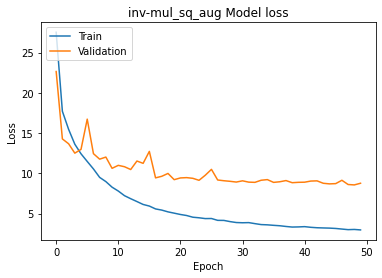

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('inv-mul_sq_aug Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
import tensorflow as tf

base_model = InceptionV3(weights='imagenet', include_top=False)
input = Input(shape=(300,300,3),name='input1')
input_gender = Input(shape=(1,),dtype='float32',name='input2')
input_age = Input(shape=(2,114),dtype='float32',name='input3')
output = base_model(input)
gender_embedding=Dense(16)(input_gender)
print (K.int_shape(output))
sq = keras.layers.GlobalAveragePooling2D()(output)
print (K.int_shape(sq))
sq = keras.layers.Reshape((1,1,2048))(sq)
sq = keras.layers.Dense(units=2048,activation="sigmoid")(sq)
block = keras.layers.multiply([output,sq])
#fine Squeeze and Excitation 1

net = keras.layers.add([output,block])
net = keras.layers.BatchNormalization()(net)
net = keras.layers.Activation("relu")(net)
net = keras.layers.MaxPooling2D(pool_size=(2, 2),name="block_1")(net)
print (K.int_shape(net))

#x=channel_attention(net)
x = keras.layers.MaxPooling2D(pool_size=(4,4))(net)
print (K.int_shape(x))
x=Flatten()(x)
f = keras.layers.Concatenate(axis=1)([x,gender_embedding])
f = Dense(256, activation='relu')(f)
x =Dense(228,activation='linear')(f)
y=Flatten()(input_age)
print(y.shape)
f = keras.layers.Multiply()([x,y])
predictions=Dense(1)(f)

#Embedding = keras.layers.Conv2D(256,kernel_size=(2,2),strides=1)(output)
#Embedding = keras.layers.AveragePooling2D(pool_size=(7,7))(Embedding)
#Embedding = Flatten()(Embedding)
#print (K.int_shape(Embedding))
#variance = Dense(1)(Embedding)

model = Model(inputs=[input,input_gender,input_age], outputs=predictions)
for i,layer in enumerate(model.layers):
    print (i,layer.name)

Adam=tf.keras.optimizers.Adam(lr=0.0001,beta_1=0.9,beta_2=0.999)
model.compile(optimizer=Adam, loss='mean_absolute_error', metrics=['MAE'],run_eagerly=True)
model.summary()

checkpoint =keras.callbacks.ModelCheckpoint(filepath='weights_inv-mul_sq_aug20_loss_dimg.{epoch:02d}-{val_loss:.2f}.hdf5',save_weights_only=True,period=20)
#model.fit_generator(DataGen.flow([x_train,gender_train],y_train,batch_size=batch_size),steps_per_epoch=np.ceil(len(y_train)/batch_size),epochs=50,verbose=1,validation_data=([x_valid,gender_valid,agev],y_valid))
history=model.fit([train_x,train_gen,agetr],train_y,batch_size=4,epochs=20,verbose=1,validation_data=([valid_x,valid_gen,agev],valid_y),callbacks = [checkpoint])
score = model.evaluate([test_x,test_gen,aget],test_y, batch_size=batch_size)
print('Test loss:', score[0])
print('Test MAE:', score[1])

(None, 8, 8, 2048)
(None, 2048)
(None, 4, 4, 2048)
(None, 1, 1, 2048)
(None, 228)
0 input1
1 inception_v3
2 global_average_pooling2d
3 reshape
4 dense_9
5 multiply_1
6 add
7 batch_normalization_188
8 activation_188
9 block_1
10 max_pooling2d_9
11 input2
12 flatten_2
13 dense_8
14 concatenate_5
15 dense_10
16 input3
17 dense_11
18 flatten_3
19 multiply_2
20 dense_12
Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input1 (InputLayer)            [(None, 300, 300, 3  0           []                               
                                )]                                                                
                                                                                                  
 inception_v3 (Functional)      (None, None, None,   21802784    ['input1[0][0]']                 
                     

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/20
1949/1949 [==============================] - 572s 293ms/step - loss: 51.0793 - MAE: 51.0793 - val_loss: 24.7892 - val_MAE: 24.7892
Epoch 2/20
1949/1949 [==============================] - 571s 293ms/step - loss: 21.3071 - MAE: 21.3071 - val_loss: 23.6796 - val_MAE: 23.6796
Epoch 3/20
1949/1949 [==============================] - 570s 293ms/step - loss: 18.3941 - MAE: 18.3941 - val_loss: 14.6644 - val_MAE: 14.6644
Epoch 4/20
1949/1949 [==============================] - 570s 292ms/step - loss: 16.4387 - MAE: 16.4387 - val_loss: 16.6463 - val_MAE: 16.6463
Epoch 5/20
1949/1949 [==============================] - 571s 293ms/step - loss: 14.9468 - MAE: 14.9468 - val_loss: 13.5213 - val_MAE: 13.5213
Epoch 6/20
1949/1949 [==============================] - 570s 292ms/step - loss: 13.7657 - MAE: 13.7657 - val_loss: 12.7904 - val_MAE: 12.7904
Epoch 7/20
1949/1949 [==============================] - 570s 293ms/step - loss: 12.7070 - MAE: 12.7070 - val_loss: 13.8046 - val_MAE: 13.8046
Epoch 

In [ ]:
checkpoint =keras.callbacks.ModelCheckpoint(filepath='weights_inv-mul_sq_aug20_loss_dimg.{epoch:02d}-{val_loss:.2f}.hdf5',save_weights_only=True,period=40)
#model.fit_generator(DataGen.flow([x_train,gender_train],y_train,batch_size=batch_size),steps_per_epoch=np.ceil(len(y_train)/batch_size),epochs=50,verbose=1,validation_data=([x_valid,gender_valid,agev],y_valid))
history=model.fit([train_x,train_gen,agetr],train_y,batch_size=4,epochs=40,verbose=1,validation_data=([valid_x,valid_gen,agev],valid_y),callbacks = [checkpoint])
score = model.evaluate([test_x,test_gen,aget],test_y, batch_size=batch_size)
print('Test loss:', score[0])
print('Test MAE:', score[1])

Epoch 1/40
1949/1949 [==============================] - 570s 292ms/step - loss: 6.4224 - MAE: 6.4224 - val_loss: 8.6277 - val_MAE: 8.6277
Epoch 2/40
1949/1949 [==============================] - 567s 291ms/step - loss: 6.1675 - MAE: 6.1675 - val_loss: 8.9993 - val_MAE: 8.9993
Epoch 3/40
1949/1949 [==============================] - 567s 291ms/step - loss: 5.8469 - MAE: 5.8469 - val_loss: 8.7425 - val_MAE: 8.7425
Epoch 4/40
1949/1949 [==============================] - 568s 291ms/step - loss: 5.8934 - MAE: 5.8934 - val_loss: 9.9627 - val_MAE: 9.9627
Epoch 5/40
1949/1949 [==============================] - 568s 291ms/step - loss: 5.8770 - MAE: 5.8770 - val_loss: 9.4165 - val_MAE: 9.4165
Epoch 6/40
1949/1949 [==============================] - 566s 291ms/step - loss: 5.5993 - MAE: 5.5993 - val_loss: 9.2457 - val_MAE: 9.2457
Epoch 7/40
1949/1949 [==============================] - 567s 291ms/step - loss: 5.3826 - MAE: 5.3826 - val_loss: 9.5756 - val_MAE: 9.5756
Epoch 8/40
1949/1949 [============

KeyboardInterrupt: ignored

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('inv-mul_sq_aug Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
def spatial_attention(input_feature):
  kernel_size = 7
  kernel_initializer = tf.keras.initializers.variance_scaling()

  avg_pool = tf.reduce_mean(input_feature, axis=[3], keepdims=True)
  assert avg_pool.get_shape()[-1] == 1
  max_pool = tf.reduce_max(input_feature, axis=[3], keepdims=True)
  assert max_pool.get_shape()[-1] == 1
  concat = tf.concat([avg_pool,max_pool], 3)
  assert concat.get_shape()[-1] == 2

  concat = Conv2D(
                              filters=1,
                              kernel_size=[kernel_size,kernel_size],
                              strides=[1,1],
                              padding="same",
                              activation=None,
                              kernel_initializer=kernel_initializer,
                              use_bias=False)(concat)
  assert concat.get_shape()[-1] == 1
  concat = tf.keras.activations.sigmoid(concat)
    
  return input_feature * concat

In [ ]:
import tensorflow as tf

base_model = InceptionV3(weights='imagenet', include_top=False)
input = Input(shape=(300,300,3),name='input1')
input_gender = Input(shape=(1,),dtype='float32',name='input2')
input_age = Input(shape=(2,114),dtype='float32',name='input3')
output = base_model(input)
gender_embedding=Dense(16)(input_gender)
print (K.int_shape(output))
x=channel_attention(output)
print (K.int_shape(x))
x=spatial_attention(x)
print (K.int_shape(x))
x = keras.layers.MaxPooling2D(pool_size=(4,4))(x)
f=Flatten()(x)
f = Dense(256, activation='relu')(f)
x =Dense(228,activation='linear')(f)
y=Flatten()(input_age)
print(y.shape)
f = keras.layers.Multiply()([x,y])
f = keras.layers.Concatenate(axis=1)([f,gender_embedding])
predictions=Dense(1)(f)

model = Model(inputs=[input,input_gender,input_age], outputs=predictions)
for i,layer in enumerate(model.layers):
    print (i,layer.name)

Adam=tf.keras.optimizers.Adam(lr=0.0001,beta_1=0.9,beta_2=0.999)
model.compile(optimizer=Adam, loss='mean_absolute_error', metrics=['MAE'])
model.summary()

checkpoint =keras.callbacks.ModelCheckpoint(filepath='weights_inv-mul_cam_aug_ndimg.{epoch:02d}-{val_loss:.2f}.hdf5',save_weights_only=True,period=50)
#model.fit_generator(DataGen.flow([x_train,gender_train],y_train,batch_size=batch_size),steps_per_epoch=np.ceil(len(y_train)/batch_size),epochs=50,verbose=1,validation_data=([x_valid,gender_valid,agev],y_valid))
history1=model.fit([train_x,train_gen,agetr],train_y,batch_size=4,epochs=50,verbose=1,validation_data=([valid_x,valid_gen,agev],valid_y),callbacks = [checkpoint])
score = model.evaluate([test_x,test_gen,aget],test_y, batch_size=batch_size)
print('Test loss:', score[0])
print('Test MAE:', score[1])

(None, 8, 8, 2048)
(None, 8, 8, 2048)
(None, 8, 8, 2048)
(None, 228)
0 input1
1 inception_v3
2 tf.math.reduce_mean_1
3 tf.math.reduce_max_1
4 dense_14
5 dense_16
6 dense_15
7 dense_17
8 tf.__operators__.add_1
9 tf.math.sigmoid_1
10 tf.math.multiply_1
11 tf.math.reduce_mean_2
12 tf.math.reduce_max_2
13 tf.concat
14 conv2d_282
15 tf.math.sigmoid_2
16 tf.math.multiply_2
17 max_pooling2d_14
18 flatten_4
19 dense_18
20 input3
21 dense_19
22 flatten_5
23 input2
24 multiply_3
25 dense_13
26 concatenate_8
27 dense_20
Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input1 (InputLayer)            [(None, 300, 300, 3  0           []                               
                                )]                                                                
                                                                        

Epoch 1/50
1949/1949 [==============================] - 100s 47ms/step - loss: 26.3327 - MAE: 26.3327 - val_loss: 21.8351 - val_MAE: 21.8351
Epoch 2/50
1949/1949 [==============================] - 90s 46ms/step - loss: 17.2423 - MAE: 17.2423 - val_loss: 17.0161 - val_MAE: 17.0161
Epoch 3/50
1949/1949 [==============================] - 90s 46ms/step - loss: 15.3100 - MAE: 15.3100 - val_loss: 14.5316 - val_MAE: 14.5316
Epoch 4/50
1949/1949 [==============================] - 91s 47ms/step - loss: 13.6772 - MAE: 13.6772 - val_loss: 15.8629 - val_MAE: 15.8629
Epoch 5/50
1949/1949 [==============================] - 90s 46ms/step - loss: 12.5129 - MAE: 12.5129 - val_loss: 11.7392 - val_MAE: 11.7392
Epoch 6/50
1949/1949 [==============================] - 90s 46ms/step - loss: 11.4626 - MAE: 11.4626 - val_loss: 12.1201 - val_MAE: 12.1201
Epoch 7/50
1949/1949 [==============================] - 90s 46ms/step - loss: 10.3160 - MAE: 10.3160 - val_loss: 12.2036 - val_MAE: 12.2036
Epoch 8/50
1949/194

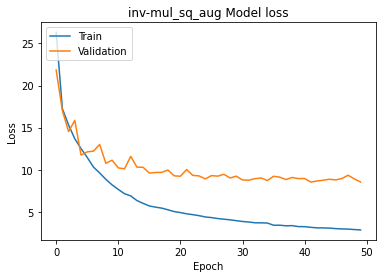

In [ ]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('inv-mul_sq_aug Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
import tensorflow as tf

base_model = InceptionV3(weights='imagenet', include_top=False)
input = Input(shape=(300,300,3),name='input1')
input_gender = Input(shape=(1,),dtype='float32',name='input2')
input_age = Input(shape=(2,114),dtype='float32',name='input3')
output = base_model(input)
gender_embedding=Dense(16)(input_gender)
print (K.int_shape(output))
#x=channel_attention(output)
#print (K.int_shape(x))
x=spatial_attention(output)
print (K.int_shape(x))
x = keras.layers.MaxPooling2D(pool_size=(4,4))(x)
f=Flatten()(x)
f = Dense(256, activation='relu')(f)
x =Dense(228,activation='linear')(f)
y=Flatten()(input_age)
print(y.shape)
f = keras.layers.Multiply()([x,y])
f = keras.layers.Concatenate(axis=1)([f,gender_embedding])
predictions=Dense(1)(f)

model = Model(inputs=[input,input_gender,input_age], outputs=predictions)
for i,layer in enumerate(model.layers):
    print (i,layer.name)

Adam=tf.keras.optimizers.Adam(lr=0.0001,beta_1=0.9,beta_2=0.999)
model.compile(optimizer=Adam, loss='mean_absolute_error', metrics=['MAE'])
model.summary()

checkpoint =keras.callbacks.ModelCheckpoint(filepath='weights_inv-mul_cam_aug_ndimg.{epoch:02d}-{val_loss:.2f}.hdf5',save_weights_only=True,period=50)
#model.fit_generator(DataGen.flow([x_train,gender_train],y_train,batch_size=batch_size),steps_per_epoch=np.ceil(len(y_train)/batch_size),epochs=50,verbose=1,validation_data=([x_valid,gender_valid,agev],y_valid))
history1=model.fit([train_x,train_gen,agetr],train_y,batch_size=4,epochs=50,verbose=1,validation_data=([valid_x,valid_gen,agev],valid_y),callbacks = [checkpoint])
score = model.evaluate([test_x,test_gen,aget],test_y, batch_size=batch_size)
print('Test loss:', score[0])
print('Test MAE:', score[1])

(None, 8, 8, 2048)
(None, 8, 8, 2048)
(None, 228)
0 input1
1 inception_v3
2 tf.math.reduce_mean_3
3 tf.math.reduce_max_3
4 tf.concat_1
5 conv2d_377
6 tf.math.sigmoid_3
7 tf.math.multiply_3
8 max_pooling2d_19
9 flatten_6
10 dense_22
11 input3
12 dense_23
13 flatten_7
14 input2
15 multiply_4
16 dense_21
17 concatenate_11
18 dense_24
Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input1 (InputLayer)            [(None, 300, 300, 3  0           []                               
                                )]                                                                
                                                                                                  
 inception_v3 (Functional)      (None, None, None,   21802784    ['input1[0][0]']                 
                                2048)                   

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/50
1949/1949 [==============================] - 98s 47ms/step - loss: 28.4171 - MAE: 28.4171 - val_loss: 21.4977 - val_MAE: 21.4977
Epoch 2/50
1949/1949 [==============================] - 88s 45ms/step - loss: 18.6296 - MAE: 18.6296 - val_loss: 15.5067 - val_MAE: 15.5067
Epoch 3/50
1949/1949 [==============================] - 87s 45ms/step - loss: 16.2993 - MAE: 16.2993 - val_loss: 15.2733 - val_MAE: 15.2733
Epoch 4/50
1949/1949 [==============================] - 87s 45ms/step - loss: 14.8416 - MAE: 14.8416 - val_loss: 16.7241 - val_MAE: 16.7241
Epoch 5/50
1949/1949 [==============================] - 87s 45ms/step - loss: 13.5166 - MAE: 13.5166 - val_loss: 14.6585 - val_MAE: 14.6585
Epoch 6/50
1949/1949 [==============================] - 87s 45ms/step - loss: 12.1997 - MAE: 12.1997 - val_loss: 15.0654 - val_MAE: 15.0654
Epoch 7/50
1949/1949 [==============================] - 87s 45ms/step - loss: 11.0335 - MAE: 11.0335 - val_loss: 19.3828 - val_MAE: 19.3828
Epoch 8/50
1949/1949

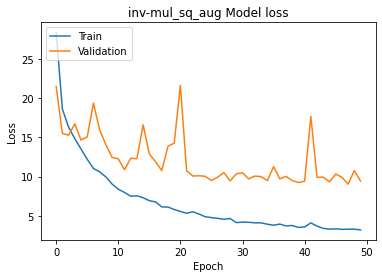

In [ ]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('inv-mul_sq_aug Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
import tensorflow as tf

base_model = InceptionV3(weights='imagenet', include_top=False)
input = Input(shape=(300,300,3),name='input1')
input_gender = Input(shape=(1,),dtype='float32',name='input2')
input_age = Input(shape=(2,114),dtype='float32',name='input3')
output = base_model(input)
gender_embedding=Dense(16)(input_gender)
print (K.int_shape(output))
#x=channel_attention(output)
#print (K.int_shape(x))
x=spatial_attention(output)
print (K.int_shape(x))
x=channel_attention(x)
x = keras.layers.MaxPooling2D(pool_size=(4,4))(x)
f=Flatten()(x)
f = Dense(256, activation='relu')(f)
x =Dense(228,activation='linear')(f)
y=Flatten()(input_age)
print(y.shape)
f = keras.layers.Multiply()([x,y])
f = keras.layers.Concatenate(axis=1)([f,gender_embedding])
predictions=Dense(1)(f)

model = Model(inputs=[input,input_gender,input_age], outputs=predictions)
for i,layer in enumerate(model.layers):
    print (i,layer.name)

Adam=tf.keras.optimizers.Adam(lr=0.0001,beta_1=0.9,beta_2=0.999)
model.compile(optimizer=Adam, loss='mean_absolute_error', metrics=['MAE'])
model.summary()

checkpoint =keras.callbacks.ModelCheckpoint(filepath='weights_inv-mul_cam_aug_ndimg.{epoch:02d}-{val_loss:.2f}.hdf5',save_weights_only=True,period=50)
#model.fit_generator(DataGen.flow([x_train,gender_train],y_train,batch_size=batch_size),steps_per_epoch=np.ceil(len(y_train)/batch_size),epochs=50,verbose=1,validation_data=([x_valid,gender_valid,agev],y_valid))
history1=model.fit([train_x,train_gen,agetr],train_y,batch_size=4,epochs=50,verbose=1,validation_data=([valid_x,valid_gen,agev],valid_y),callbacks = [checkpoint])
score = model.evaluate([test_x,test_gen,aget],test_y, batch_size=batch_size)
print('Test loss:', score[0])
print('Test MAE:', score[1])

(None, 8, 8, 2048)
(None, 8, 8, 2048)
(None, 228)
0 input1
1 inception_v3
2 tf.math.reduce_mean_4
3 tf.math.reduce_max_4
4 tf.concat_2
5 conv2d_472
6 tf.math.sigmoid_4
7 tf.math.multiply_4
8 tf.math.reduce_mean_5
9 tf.math.reduce_max_5
10 dense_26
11 dense_28
12 dense_27
13 dense_29
14 tf.__operators__.add_2
15 tf.math.sigmoid_5
16 tf.math.multiply_5
17 max_pooling2d_24
18 flatten_8
19 dense_30
20 input3
21 dense_31
22 flatten_9
23 input2
24 multiply_5
25 dense_25
26 concatenate_14
27 dense_32
Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input1 (InputLayer)            [(None, 300, 300, 3  0           []                               
                                )]                                                                
                                                                                        

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/50
1949/1949 [==============================] - 99s 47ms/step - loss: 26.8509 - MAE: 26.8509 - val_loss: 22.9908 - val_MAE: 22.9908
Epoch 2/50
1949/1949 [==============================] - 90s 46ms/step - loss: 17.8477 - MAE: 17.8477 - val_loss: 16.5954 - val_MAE: 16.5954
Epoch 3/50
1949/1949 [==============================] - 90s 46ms/step - loss: 15.3814 - MAE: 15.3814 - val_loss: 14.7075 - val_MAE: 14.7075
Epoch 4/50
1949/1949 [==============================] - 90s 46ms/step - loss: 14.0324 - MAE: 14.0324 - val_loss: 12.6550 - val_MAE: 12.6550
Epoch 5/50
1949/1949 [==============================] - 90s 46ms/step - loss: 12.4047 - MAE: 12.4047 - val_loss: 14.1948 - val_MAE: 14.1948
Epoch 6/50
1949/1949 [==============================] - 90s 46ms/step - loss: 11.3564 - MAE: 11.3564 - val_loss: 12.3527 - val_MAE: 12.3527
Epoch 7/50
1949/1949 [==============================] - 90s 46ms/step - loss: 10.3814 - MAE: 10.3814 - val_loss: 12.4281 - val_MAE: 12.4281
Epoch 8/50
1949/1949

In [ ]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('inv-mul_sq_aug Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
import tensorflow as tf

base_model = InceptionV3(weights='imagenet', include_top=False)
input = Input(shape=(300,300,3),name='input1')
input_gender = Input(shape=(1,),dtype='float32',name='input2')
input_age = Input(shape=(2,114),dtype='float32',name='input3')
output = base_model(input)
gender_embedding=Dense(16)(input_gender)
print (K.int_shape(output))
x=spatial_attention(output)
sq = keras.layers.GlobalAveragePooling2D()(x)
print (K.int_shape(sq))
sq = keras.layers.Reshape((1,1,2048))(sq)
sq = keras.layers.Dense(units=2048,activation="sigmoid")(sq)
block = keras.layers.multiply([output,sq])
#fine Squeeze and Excitation 1

net = keras.layers.add([output,block])
net = keras.layers.BatchNormalization()(net)
net = keras.layers.Activation("relu")(net)
net = keras.layers.MaxPooling2D(pool_size=(2, 2),name="block_1")(net)
print (K.int_shape(net))

#x=channel_attention(net)
x = keras.layers.MaxPooling2D(pool_size=(4,4))(net)
print (K.int_shape(x))
x=Flatten()(x)
f = keras.layers.Concatenate(axis=1)([x,gender_embedding])
f = Dense(256, activation='relu')(f)
x =Dense(228,activation='linear')(f)
y=Flatten()(input_age)
print(y.shape)
f = keras.layers.Multiply()([x,y])
predictions=Dense(1)(f)

#Embedding = keras.layers.Conv2D(256,kernel_size=(2,2),strides=1)(output)
#Embedding = keras.layers.AveragePooling2D(pool_size=(7,7))(Embedding)
#Embedding = Flatten()(Embedding)
#print (K.int_shape(Embedding))
#variance = Dense(1)(Embedding)

model = Model(inputs=[input,input_gender,input_age], outputs=predictions)
for i,layer in enumerate(model.layers):
    print (i,layer.name)

Adam=tf.keras.optimizers.Adam(lr=0.0001,beta_1=0.9,beta_2=0.999)
model.compile(optimizer=Adam, loss='mean_absolute_error', metrics=['MAE'],run_eagerly=True)
model.summary()

checkpoint =keras.callbacks.ModelCheckpoint(filepath='weights_inv-mul_sq_aug20_loss_dimg.{epoch:02d}-{val_loss:.2f}.hdf5',save_weights_only=True,period=20)
#model.fit_generator(DataGen.flow([x_train,gender_train],y_train,batch_size=batch_size),steps_per_epoch=np.ceil(len(y_train)/batch_size),epochs=50,verbose=1,validation_data=([x_valid,gender_valid,agev],y_valid))
history=model.fit([train_x,train_gen,agetr],train_y,batch_size=4,epochs=20,verbose=1,validation_data=([valid_x,valid_gen,agev],valid_y),callbacks = [checkpoint])
score = model.evaluate([test_x,test_gen,aget],test_y, batch_size=batch_size)
print('Test loss:', score[0])
print('Test MAE:', score[1])